In [1]:
# credit: Kevin G. Field (kgfield@umich.edu) wrote this code, Pengyuan Xiu (xiupy@umich.edu) modified it

from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 as cv
from skimage.filters import threshold_otsu
from skimage.filters import threshold_triangle
from skimage.filters import threshold_minimum
from skimage.filters import threshold_yen
from skimage.filters import threshold_li
from skimage import filters

In [2]:
def read_data(file_name):
    n = []
    with open(file_name,'r') as file:
        for line in file:
            n.append(
                line.strip().split(';'))
    df = pd.DataFrame(n)
    matrix = df.astype(int).to_numpy()
    
    return matrix

In [3]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

### Read data and make pixel value dataframe

In [4]:
# add in the elements of interest
Ni_file = 'ASB-unirradiated_Ni.txt'
Cr_file = 'ASB-unirradiated_Cr.txt' 
Cu_file = 'ASB-unirradiated_Cu.txt'
Nb_file = 'ASB-unirradiated_Nb.txt'
Si_file = 'ASB-unirradiated_Si.txt'

In [5]:
Ni_cts = read_data(Ni_file)
Cr_cts = read_data(Cr_file)
Cu_cts = read_data(Cu_file)
Nb_cts = read_data(Nb_file)
Si_cts = read_data(Si_file)

Perform simple threshold to remove background/noise in data:


In [6]:
# apply a low count threshold to filter noisy data, may need to change depending on the elements selected
Cu_cts[Cu_cts<5] = 0
Ni_cts[Ni_cts<2] = 0
Cr_cts[Cr_cts<5] = 0
Nb_cts[Nb_cts<2] = 0
Si_cts[Si_cts<1] = 0

Perform a gaussian blur on each map to help with noise to signal ratio, then convert to 0-255 value scale

In [7]:
#Norm_Ni=NormalizeData(cv.blur(Ni_cts,(5,5)))*255
#Norm_Cr=NormalizeData(cv.blur(Cr_cts,(5,5)))*255
#Norm_Cu=NormalizeData(cv.blur(Cu_cts,(5,5)))*255
#Norm_Nb=NormalizeData(cv.blur(Nb_cts,(5,5)))*255

# apply gaussian filter to smooth out the map. may need to change the sigma values here. higher the sigma, more smooth/blurred the image will be

Norm_Ni=NormalizeData(filters.gaussian(Ni_cts,sigma=3))*255
Norm_Cr=NormalizeData(filters.gaussian(Cr_cts,sigma=3))*255
Norm_Cu=NormalizeData(filters.gaussian(Cu_cts,sigma=2))*255
Norm_Nb=NormalizeData(filters.gaussian(Nb_cts,sigma=4.5))*255
Norm_Si=NormalizeData(filters.gaussian(Si_cts,sigma=3))*255

Norm_Ni[np.isnan(Norm_Ni)]=0
Norm_Cr[np.isnan(Norm_Cr)]=0
Norm_Cu[np.isnan(Norm_Cu)]=0
Norm_Nb[np.isnan(Norm_Nb)]=0
Norm_Si[np.isnan(Norm_Si)]=0

Perform adaptive thresholding (triangle alogrithm) to remove background  and apply false color for each map, could be map as loop

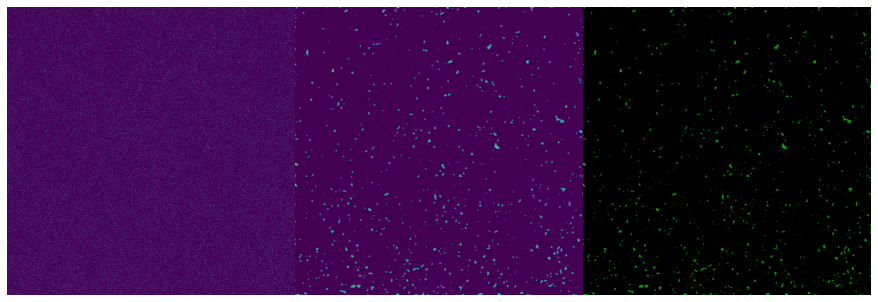

In [8]:
if np.any(Norm_Ni):
  Norm_Ni[Norm_Ni<threshold_triangle(Norm_Ni)] = 0
colNi=np.repeat(Norm_Ni[:, :, np.newaxis], 3, axis=2)
col=np.array((0,1,0))
colNi=col*colNi

colNi=colNi.astype(int)

#colNi[np.all(colNi<1, axis=2)] = 255

fig1, ax = plt.subplots(1,3)
ax[0].imshow(Ni_cts)
ax[0].axis('off')
ax[1].imshow(Norm_Ni)
ax[1].axis('off')
ax[2].imshow(colNi)
ax[2].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=2, bottom=0, top=1)
plt.show()

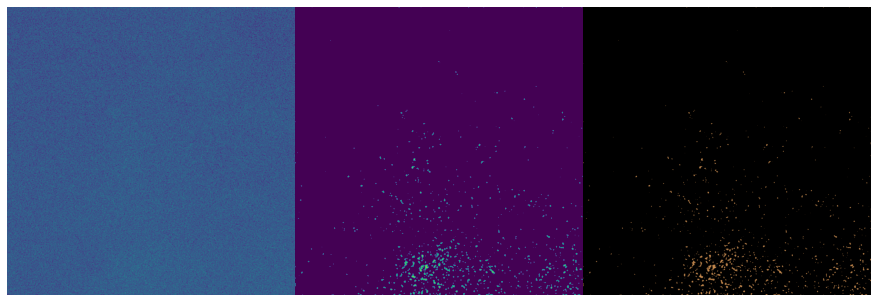

In [9]:
if np.any(Norm_Cu):
  Norm_Cu[Norm_Cu<threshold_triangle(Norm_Cu)] = 0

colCu=np.repeat(Norm_Cu[:, :, np.newaxis], 3, axis=2)
colCu[:,:,0]=colCu[:,:,0]*(255/255)
colCu[:,:,1]=colCu[:,:,1]*(178/255)
colCu[:,:,2]=colCu[:,:,2]*(102/255)

colCu=colCu.astype(int)

#colCu[np.all(colCu<1, axis=2)] = 255
fig2, ax = plt.subplots(1,3)
ax[0].imshow(Cu_cts)
ax[0].axis('off')
ax[1].imshow(Norm_Cu)
ax[1].axis('off')
ax[2].imshow(colCu)
ax[2].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=2, bottom=0, top=1)
plt.show()

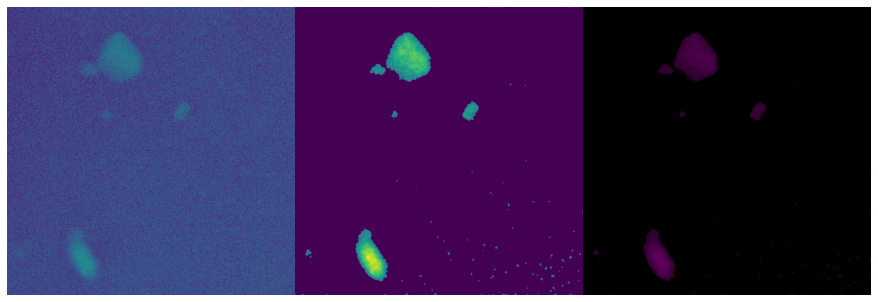

In [10]:
if np.any(Norm_Cr):  
  Norm_Cr[Norm_Cr<threshold_triangle(Norm_Cr)] = 0

colCr=np.repeat(Norm_Cr[:, :, np.newaxis], 3, axis=2)
colCr[:,:,0]=colCr[:,:,0]*(103/255)
colCr[:,:,1]=colCr[:,:,1]*(0/255)
colCr[:,:,2]=colCr[:,:,2]*(103/255)

colCr=colCr.astype(int)
#colCr[np.all(colCr<1, axis=2)] = 255
fig2, ax = plt.subplots(1,3)
ax[0].imshow(Cr_cts)
ax[0].axis('off')
ax[1].imshow(Norm_Cr)
ax[1].axis('off')
ax[2].imshow(colCr)
ax[2].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=2, bottom=0, top=1)
plt.show()

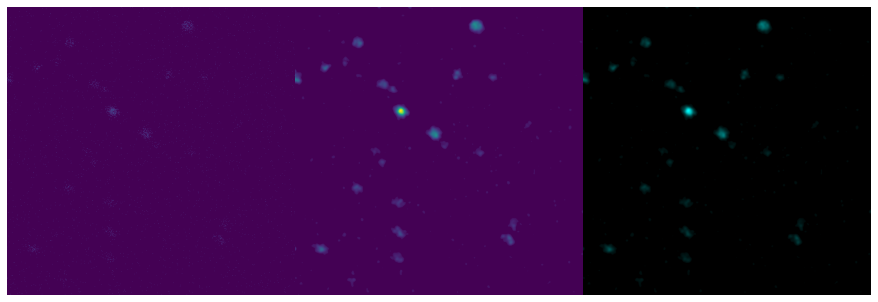

In [11]:
#if np.any(Norm_Nb):  
#  Norm_Nb[Norm_Nb<threshold_yen(Norm_Nb)] = 0

if np.any(Norm_Nb):  
  Norm_Nb[Norm_Nb<threshold_triangle(Norm_Nb)] = 0

colNb=np.repeat(Norm_Nb[:, :, np.newaxis], 3, axis=2)
colNb[:,:,0]=colNb[:,:,0]*0
colNb[:,:,1]=colNb[:,:,1]*1
colNb[:,:,2]=colNb[:,:,2]*1

colNb=colNb.astype(int)

#colNb[np.all(colNb<1, axis=2)] = 255

fig2, ax = plt.subplots(1,3)
ax[0].imshow(Nb_cts)
ax[0].axis('off')
ax[1].imshow(Norm_Nb)
ax[1].axis('off')
ax[2].imshow(colNb)
ax[2].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=2, bottom=0, top=1)
plt.show()

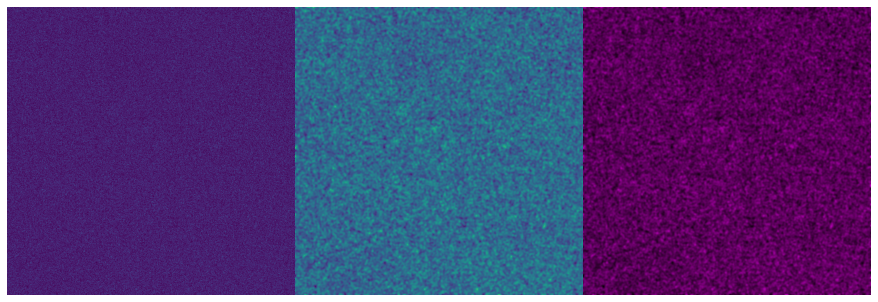

In [12]:
if np.any(Norm_Si):  
  Norm_Nb[Norm_Si<threshold_yen(Norm_Si)] = 0

colSi=np.repeat(Norm_Si[:, :, np.newaxis], 3, axis=2)
colSi[:,:,0]=colSi[:,:,0]*1
colSi[:,:,1]=colSi[:,:,1]*0
colSi[:,:,2]=colSi[:,:,2]*1

colSi=colSi.astype(int)

#colNb[np.all(colNb<1, axis=2)] = 255

fig2, ax = plt.subplots(1,3)
ax[0].imshow(Si_cts)
ax[0].axis('off')
ax[1].imshow(Norm_Si)
ax[1].axis('off')
ax[2].imshow(colSi)
ax[2].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=2, bottom=0, top=1)
plt.show()

Perform additive color mixing of maps of interest and then annonate the image with necessary outputs

In [13]:
interim_1=np.maximum(colNb,colCu)
interim_2=np.maximum(interim_1,colNi)
test=np.maximum(interim_2,colCr)
#test=colNi + colCu + colNb +colCr +colNb
print(test)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0 141   0]
  [  0 141   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 44 146  44]
  [ 41 148  41]
  [  0 147   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 49 147  49]
  [ 46 150  46]
  [ 42 149  42]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


(-0.5, 1023.5, 1023.5, -0.5)

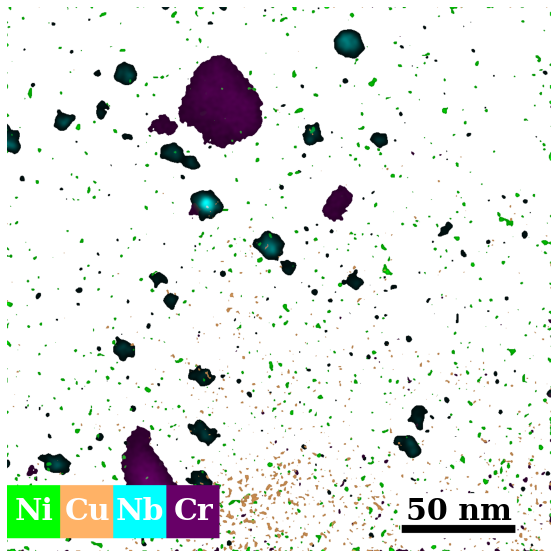

In [14]:
#test=colNi + colCu + colNb +colCr #+colNb

#Convert background from black to white
test[np.all(test<10, axis=2)] = 255

#Adding color block legend
test[900:1000,0:100,0]=0
test[900:1000,0:100,1]=255
test[900:1000,0:100,2]=0

test[900:1000,100:200,0]=255
test[900:1000,100:200,1]=178
test[900:1000,100:200,2]=102

test[900:1000,200:300,0]=0
test[900:1000,200:300,1]=255
test[900:1000,200:300,2]=255

test[900:1000,300:400,0]=103
test[900:1000,300:400,1]=0
test[900:1000,300:400,2]=103

#White background for scale bar
test[915:1000,740:960,0]=255
test[915:1000,740:960,1]=255
test[915:1000,740:960,2]=255

#Make a scale bar - this needs to change for the given pixel/nm
test[975:990,743:957,0]=0
test[975:990,743:957,1]=0
test[975:990,743:957,2]=0

#Scaled for 10 in by 10 in
fig2 = plt.figure(figsize = (10,10))

plt.imshow(test)

#Add text to colorblock legend and scale bar
plt.text(50,950,'Ni',color='white', horizontalalignment='center',verticalalignment='center', fontsize=30,fontfamily='serif',fontweight='bold')
plt.text(150,950,'Cu',color='white', horizontalalignment='center',verticalalignment='center', fontsize=30,fontfamily='serif',fontweight='bold')
plt.text(250,950,'Nb',color='white', horizontalalignment='center',verticalalignment='center', fontsize=30,fontfamily='serif',fontweight='bold')
plt.text(350,950,'Cr',color='white', horizontalalignment='center',verticalalignment='center', fontsize=30,fontfamily='serif',fontweight='bold')
plt.text(850,950,'50 nm',color='black', horizontalalignment='center',verticalalignment='center', fontsize=30,fontfamily='serif',fontweight='bold')
plt.axis('off')
